#  This is a shared notebook for Project I - Group 3

## Data Cleaning

In [1]:
#Dependencies
import os
import pandas as pd
import calendar
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#csvDir = os.path.join("Resources")
#col_list = ["month_of_death","day_of_week_of_death","current_data_year",
#                              "manner_of_death","358_cause_recode","sex","detail_age"]
#masterDf = pd.DataFrame()
#files = os.listdir(csvDir)
#for file in files:
#    if file.endswith(".csv"):
#        curCsv = os.path.join(csvDir,file)
#        with open(curCsv) as file:
#            x = pd.read_csv(file, usecols=col_list)
#            masterDf = pd.concat([masterDf,x],axis=0)

In [3]:
path = '/Users/bmacgreg/Documents/Bootcamp/Project_1/Project-1Team3/bundle_archive'
col_list = ["month_of_death","day_of_week_of_death","current_data_year",
                              "manner_of_death","358_cause_recode","sex","detail_age"]
masterDf = pd.DataFrame()
files = glob.glob(path + "/*.csv")
for file in files:
    x = pd.read_csv(file, usecols=col_list)
    masterDf = pd.concat([masterDf,x],axis=0)
masterDf

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
0,1,F,68,6,2010,7.0,187
1,1,F,12,1,2010,7.0,94
2,1,F,75,1,2010,7.0,122
3,1,M,61,6,2010,7.0,175
4,1,F,46,7,2010,2.0,429
...,...,...,...,...,...,...,...
2547859,9,M,60,6,2012,7.0,52
2547860,12,M,74,2,2012,7.0,159
2547861,11,M,71,6,2012,7.0,93
2547862,10,M,62,3,2012,1.0,418


In [4]:
#Filter to only deaths related to cars
car_death_data = masterDf[(masterDf["358_cause_recode"] >=385) & (masterDf["358_cause_recode"] <=398)]
car_death_data

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,1,M,76,5,2010,1.0,397
108,1,M,19,6,2010,1.0,396
204,1,M,58,1,2010,1.0,397
223,2,M,43,2,2010,1.0,397
279,1,M,55,7,2010,1.0,397
...,...,...,...,...,...,...,...
2547415,12,M,11,6,2012,1.0,397
2547466,12,M,47,7,2012,1.0,393
2547503,12,M,21,7,2012,1.0,397
2547682,12,F,25,1,2012,1.0,395


In [5]:
#Clean up the dataframe so that it is readable
month_dict = {
      1:"January",
      2:"February",
      3:"March",
      4:"April",
      5:"May",
      6:"June",
      7:"July",
      8:"August",
      9:"September",
      10:"October",
      11:"November",
      12:"December"}
      
day_of_week_dict = {
      1:"Sunday",
      2:"Monday",
      3:"Tuesday",
      4:"Wednesday",
      5:"Thursday",
      6:"Friday",
      7:"Saturday",
      9:"Unknown"}

manner_of_death_dict = {
      1:"Accident",
      2:"Suicide",
      3:"Homicide",
      4:"Pending investigation",
      5:"Could not determine",
      6:"Self-Inflicted",
      7:"Natural"}
#       "Blank":"Not specified"}

cause_recode_dict = {
      385:" 385- Motor vehicle accidents",
      386:" 386- Pedestrian involved in collision with motor vehicle",
      387:" 387- Pedalcyclist involved in collision with motor vehicle",
      388:" 388- Motorcyclist involved in any accident except collision with railway train",
      389:" 389- Motor vehicle accident involving collision with railway train",
      390:" 390- Motorcyclist involved in collision with railway train",
      391:" 391- Other motor vehicle accident involving collision with railway train",
      392:" 392- Occupant of motor vehicle involved in collision with other (non- motorized) road vehicle, streetcar, animal or pedestrian",
      393:" 393- Occupant of car, pickup truck or van involved in collision with other motor vehicle",
      394:" 394- Occupant of heavy transport vehicle or bus involved in collision with other motor vehicle",
      395:" 395- Occupant of motor vehicle involved in non-collision accident",
      396:" 396- Occupant of special-use motor vehicle involved in any accident",
      397:" 397- Other and unspecified motor vehicle accidents",
      398:" 398- Streetcar accidents"}
    

clean_df = car_death_data.replace({"month_of_death": month_dict, 
                        "day_of_week_of_death": day_of_week_dict,
                        "manner_of_death": manner_of_death_dict,
                        "358_cause_recode": cause_recode_dict})

clean_df

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...
...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv..."
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...


In [6]:
#  check quality of data
#  list all unique values in each columns

colNames = list(clean_df.columns)
for col in colNames:
    print(col)
    print(f"{clean_df[col].unique()}")
    print("----------")

month_of_death
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
sex
['M' 'F']
----------
detail_age
[ 76  19  58  43  55  40  21  56  14  16  70  39  42  54  68  18  72  25
  29  20  60  17  63  37  31  51  85  24  59  57  47  71  84   6  10  53
   8  64  28  89  62  66  22  26  38  46  15  75  49  88  36  65  83  73
  44  50  34  30   1  27  23  33  41  77  11   9  45  80  61  78  32   2
   4  79  67  86   7  91  87  48  81  90  35  52  74  69  97   3  82   5
  96  94  13  93 101  92  95  98  12 999  99 100 104 103 106 102 107]
----------
day_of_week_of_death
['Thursday' 'Friday' 'Sunday' 'Monday' 'Saturday' 'Tuesday' 'Wednesday'
 'Unknown']
----------
current_data_year
[2010 2011 2007 2006 2014 2015 2009 2008 2005 2013 2012]
----------
manner_of_death
['Accident' 'Natural' nan 'Homicide' 'Could not determine' 'Suicide'
 'Pending investigation']
----------
358_cause_recode
[' 397- Other and unspecified motor ve

In [7]:
#  Clean up
#  Remove not logical data 
# ie: age of 999, day of week : Unknown, manner_of_death nan, need filter by Accident
finalDf = clean_df[clean_df["detail_age"] != 999]
finalDf = finalDf[finalDf["manner_of_death"] == "Accident"]
finalDf =  finalDf[finalDf["day_of_week_of_death"] != "Unknown"]
finalDf

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...
...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv..."
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...


In [8]:
# Enforcing order of day of week and months
finalDf['day_of_week_of_death'] = pd.Categorical(finalDf['day_of_week_of_death'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)
finalDf["month_of_death"] =  pd.Categorical(finalDf['month_of_death'], categories=
    ["January","February","March","April","May","June","July","August","September","October","November","December"],ordered=True)

## Analysis

In [9]:
finalDf.dtypes

month_of_death          category
sex                       object
detail_age                 int64
day_of_week_of_death    category
current_data_year          int64
manner_of_death           object
358_cause_recode          object
dtype: object

In [10]:
census_summary_df = pd.read_csv("nc-est2019-agesex_rearranged.csv")
census_summary_df = census_summary_df.rename(columns={'Age group': 'Age_group', 'Both sexes': 'Both_sexes'})
census_summary_df

,Age_group,Age,Year,Both_sexes,Male,Female
0,1,Under 5 years,2010,20188815,10312617,9876198
1,1,Under 5 years,2011,20123103,10279719,9843384
2,1,Under 5 years,2012,19976065,10204340,9771725
3,1,Under 5 years,2013,19849215,10141578,9707637
4,1,Under 5 years,2014,19872349,10159548,9712801
...,...,...,...,...,...,...
175,18,85 years and over,2015,6261880,2169359,4092521
176,18,85 years and over,2016,6381541,2234144,4147397
177,18,85 years and over,2017,6467173,2286700,4180473
178,18,85 years and over,2018,6544300,2334553,4209747


In [11]:
def label_age_group (row):
    if row['detail_age'] < 5 :
        return '1'
    elif row['detail_age'] < 10 :
        return '2'
    elif row['detail_age'] < 15 :
        return '3'
    elif row['detail_age'] < 20 :
        return '4'
    elif row['detail_age'] < 25 :
        return '5'
    elif row['detail_age'] < 30 :
        return '6'
    elif row['detail_age'] < 35 :
        return '7'
    elif row['detail_age'] < 40 :
        return '8'
    elif row['detail_age'] < 45 :
        return '9'
    elif row['detail_age'] < 50 :
        return '10'
    elif row['detail_age'] < 55 :
        return '11'
    elif row['detail_age'] < 60 :
        return '12'
    elif row['detail_age'] < 65 :
        return '13'
    elif row['detail_age'] < 70 :
        return '14'
    elif row['detail_age'] < 75 :
        return '15'
    elif row['detail_age'] < 80 :
        return '16'
    elif row['detail_age'] < 85 :
        return '17'    
    else:
        return '18'

finalDf['age_group'] = finalDf.apply (lambda row: label_age_group(row), axis=1)
finalDf


,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,age_group
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...,16
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...,4
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...,12
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...,9
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...,12
...,...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...,3
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv...",10
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...,5
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...,6


In [12]:
census_summary_df.dtypes

Age_group      int64
Age           object
Year           int64
Both_sexes     int64
Male           int64
Female         int64
dtype: object

In [15]:
finalDf["age_group"] = pd.to_numeric(finalDf["age_group"])
finalDf.dtypes

month_of_death          category
sex                       object
detail_age                 int64
day_of_week_of_death    category
current_data_year          int64
manner_of_death           object
358_cause_recode          object
age_group                  int64
dtype: object

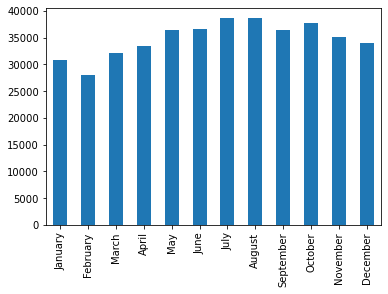

In [16]:
hist_month = finalDf['month_of_death'].value_counts()[["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]].plot(kind='bar')
#hist_month = finalDf['month_of_death'].value_counts().plot(kind='bar')

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

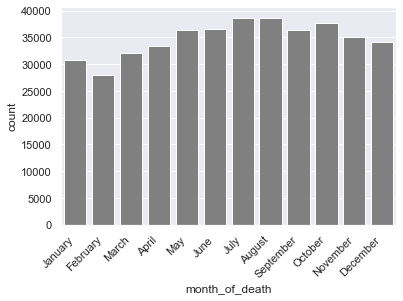

In [17]:
sns.set()
hist_month = sns.countplot(finalDf['month_of_death'], color='gray')
hist_month.set_xticklabels(hist_month.get_xticklabels(), rotation=45, horizontalalignment='right')

Text(0.5, 1.0, 'Total Deaths by Month and Year')

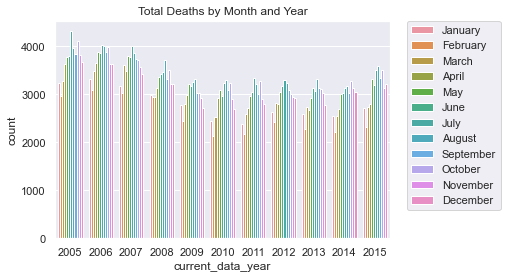

In [18]:
ax = sns.countplot(x="current_data_year", hue="month_of_death", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Deaths by Month and Year")
#https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position

[Text(0, 0, ' 397- Other and unspecified motor vehicle accidents'),
 Text(0, 0, ' 396- Occupant of special-use motor vehicle involved in any accident'),
 Text(0, 0, ' 388- Motorcyclist involved in any accident except collision with railway train'),
 Text(0, 0, ' 394- Occupant of heavy transport vehicle or bus involved in collision with other motor vehicle'),
 Text(0, 0, ' 395- Occupant of motor vehicle involved in non-collision accident'),
 Text(0, 0, ' 387- Pedalcyclist involved in collision with motor vehicle'),
 Text(0, 0, ' 386- Pedestrian involved in collision with motor vehicle'),
 Text(0, 0, ' 393- Occupant of car, pickup truck or van involved in collision with other motor vehicle'),
 Text(0, 0, ' 392- Occupant of motor vehicle involved in collision with other (non- motorized) road vehicle, streetcar, animal or pedestrian'),
 Text(0, 0, ' 391- Other motor vehicle accident involving collision with railway train'),
 Text(0, 0, ' 390- Motorcyclist involved in collision with railway

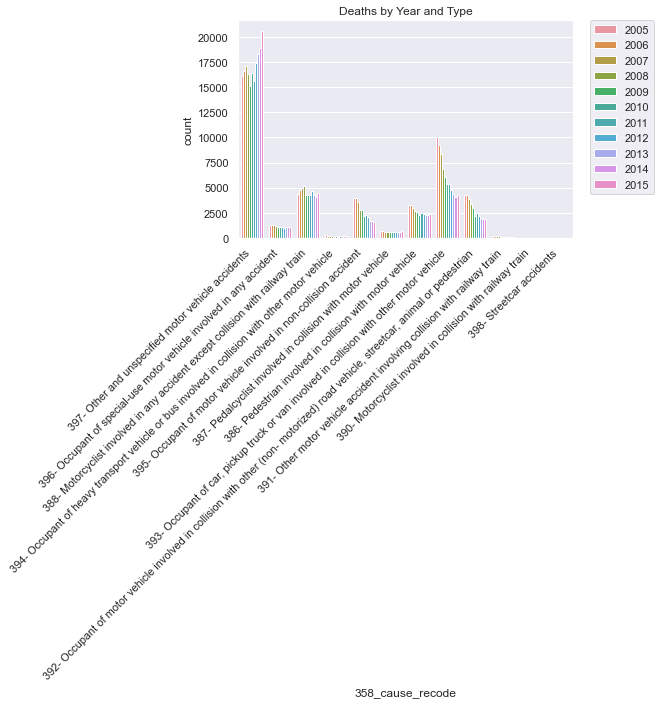

In [19]:
ax = sns.countplot(hue="current_data_year", x="358_cause_recode", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Deaths by Year and Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

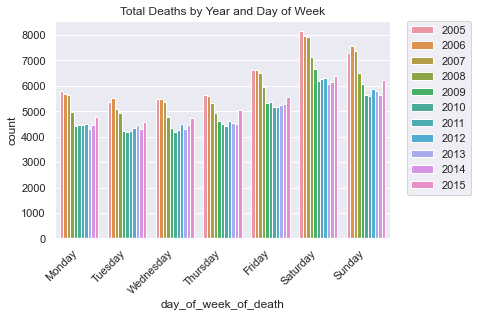

In [20]:
ax = sns.countplot(hue="current_data_year", x="day_of_week_of_death", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Deaths by Year and Day of Week")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position

[Text(0, 0, '(0, 15]'),
 Text(0, 0, '(15, 20]'),
 Text(0, 0, '(20, 25]'),
 Text(0, 0, '(25, 30]'),
 Text(0, 0, '(30, 35]'),
 Text(0, 0, '(35, 40]'),
 Text(0, 0, '(40, 45]'),
 Text(0, 0, '(45, 50]'),
 Text(0, 0, '(50, 55]'),
 Text(0, 0, '(55, 60]'),
 Text(0, 0, '(60, 65]'),
 Text(0, 0, '(65, 70]'),
 Text(0, 0, '(70, 75]'),
 Text(0, 0, '(75, 80]'),
 Text(0, 0, '(80, 85]'),
 Text(0, 0, '(85, 90]'),
 Text(0, 0, '(90, 95]'),
 Text(0, 0, '(95, 100]'),
 Text(0, 0, '(100, 105]'),
 Text(0, 0, '(105, 110]')]

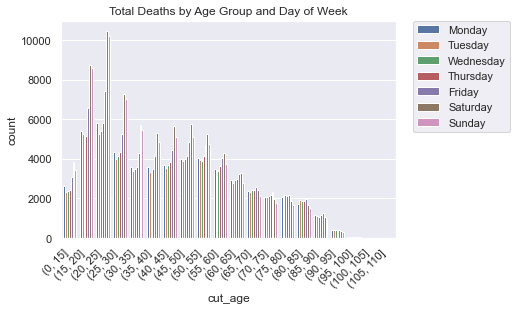

In [21]:
#order=['Sunday', 'Monday', 'Tuesday' ,'Wednesday','Thursday' ,'Friday', 'Saturday']
cut_bins = [0,15,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
finalDf['cut_age'] = pd.cut(finalDf['detail_age'], bins=cut_bins) #labels=cut_labels_4)
ax = sns.countplot(hue="day_of_week_of_death", x="cut_age", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Deaths by Age Group and Day of Week")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18')]

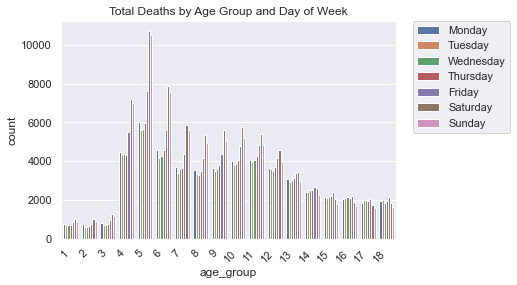

In [22]:
#order=['Sunday', 'Monday', 'Tuesday' ,'Wednesday','Thursday' ,'Friday', 'Saturday']
#cut_bins = [0,15,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#finalDf['cut_age'] = pd.cut(finalDf['detail_age'], bins=cut_bins) #labels=cut_labels_4)
ax = sns.countplot(hue="day_of_week_of_death", x="age_group", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Deaths by Age Group and Day of Week")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
ax = sns.barplot(x = 'Age', y = 'Both_sexes', hue='Year', data = census_summary_df)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("US Population by Age Group")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')